<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Conceptos-básicos" data-toc-modified-id="Conceptos-básicos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Conceptos básicos</a></span></li><li><span><a href="#Tipos-de-variables" data-toc-modified-id="Tipos-de-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tipos de variables</a></span></li><li><span><a href="#Tipos-de-distribuciones" data-toc-modified-id="Tipos-de-distribuciones-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tipos de distribuciones</a></span></li><li><span><a href="#Tipos-de-aprendizajes(machine-learning)" data-toc-modified-id="Tipos-de-aprendizajes(machine-learning)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tipos de aprendizajes(<em>machine learning</em>)</a></span></li><li><span><a href="#Tipos-de-modelos" data-toc-modified-id="Tipos-de-modelos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Tipos de modelos</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

En la clase de hoy recordaremos algunos de los conceptos básicos de estaadística. Pero lo haremos en grupos. El objetivo de la clase de hoy será: 

- Crearemos tres equipos de tres personas cada uno. 


- A cada grupo le asignaremos una serie de conceptos que como equipo tendréis que buscar y explicar a vuestros compañeros. 


- Algunos de los conceptos tienen sus propios métodos en Python, para esos deberéis buscar también el método correspondiente y explicar el resultado que nos da. 

Como ejemplo, usaremos el siguiente *dataset* 👇🏽

In [2]:
df = pd.read_csv("data/iris.csv", index_col = 0)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
nuevas = {i: i.replace(".", "_") for i in df.columns}
df = df.rename(columns = nuevas)
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


Los equipos serán los siguientes: 

- **EQUIPO 1** 

   - Mónica
   - Ali
   - Pablo


- **EQUIPO 2**

    - Antonio
    - Edu
    - Rodri


- **EQUIPO 3** 

    - Miguel
    - Fer
    - Christian

# Conceptos básicos

- **Media**: es el resultado de sumar todos los datos y dividirlo entre el número total de datos. Es una medida de tendencia central, es decir, el resultado del cálculo de una media dará un resultado ubicado en el centro de los valores con los que se ha calculado.


In [4]:
numericas = df.select_dtypes(include = np.number)
numericas.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [5]:
for col in numericas:
    print(f"La media de la columna {col} es: \n")
    print(df[col].mean())
    print("------------------------------------")

La media de la columna sepal_length es: 

5.843333333333334
------------------------------------
La media de la columna sepal_width es: 

3.0573333333333337
------------------------------------
La media de la columna petal_length es: 

3.7580000000000005
------------------------------------
La media de la columna petal_width es: 

1.1993333333333336
------------------------------------


- **Mediana**: es el valor que ocupa el lugar central de una lista formada por todos los datos ordenados por su valor.


In [6]:
for col in numericas:
    print(f"La mediana de la columna {col} es: \n")
    print(df[col].median())
    print("------------------------------------")

La mediana de la columna sepal_length es: 

5.8
------------------------------------
La mediana de la columna sepal_width es: 

3.0
------------------------------------
La mediana de la columna petal_length es: 

4.35
------------------------------------
La mediana de la columna petal_width es: 

1.3
------------------------------------


- **Moda**: es el número que más veces se repite dentro de nuestros datos.


In [7]:
for col in numericas:
    print(f"La moda de la columna {col} es: \n")
    print(df[col].mode()[0])
    print("------------------------------------")

La moda de la columna sepal_length es: 

5.0
------------------------------------
La moda de la columna sepal_width es: 

3.0
------------------------------------
La moda de la columna petal_length es: 

1.4
------------------------------------
La moda de la columna petal_width es: 

0.2
------------------------------------


- **Varianza**: es una medida de dispersión que representa la variabilidad de una serie de datos respecto a su media.


In [8]:
for col in numericas:
    print(f"La varianza de la columna {col} es: \n")
    print(df[col].var())
    print("------------------------------------")

La varianza de la columna sepal_length es: 

0.6856935123042507
------------------------------------
La varianza de la columna sepal_width es: 

0.189979418344519
------------------------------------
La varianza de la columna petal_length es: 

3.116277852348993
------------------------------------
La varianza de la columna petal_width es: 

0.5810062639821029
------------------------------------


- **Outliers o Valores perdidos**: 

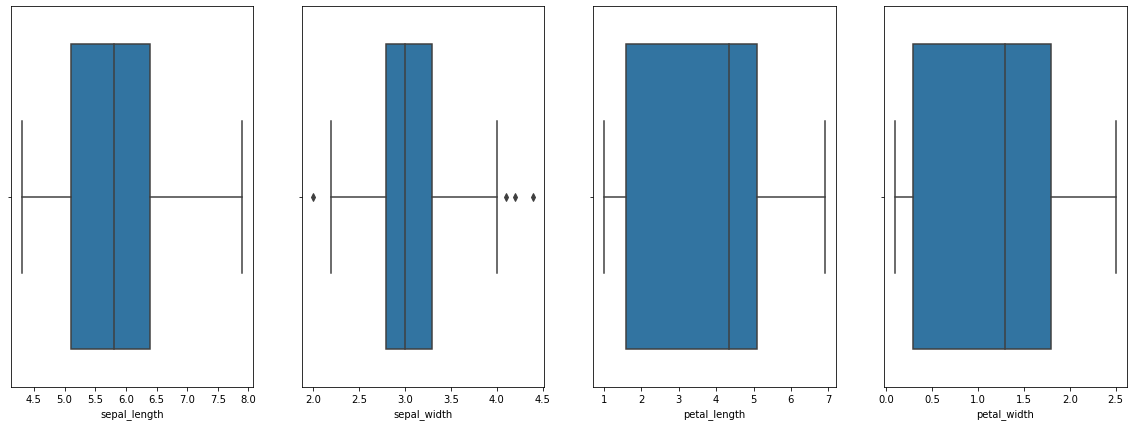

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(20,7))

for i in range(len(numericas.columns)): 
    sns.boxplot(numericas.columns[i], data = df , ax = axes[i])   
plt.show();


- **Cuartiles**: son cada uno de los tres valores que pueden dividir un grupo de números, ordenados de menor a mayor, en cuatro partes iguales. En otras palabras, cada cuartil determina la separación entre uno y otro subgrupo, dentro de un conjunto de valores estudiados. De esta forma podremos identificar 3 cuartiles:

    - Q1: representa el 25% de los datos

    - Q2: los que están por debajo de este cuartil representan el 50% de los datos.

    - Q3: representa el 75% de los datos.

In [10]:
cuartiles = [0.25, 0.5, 0.75]

for i in cuartiles: 
    print(f"Los valores para las columnas numéricas del cuartil {i} es: \n")
    print(df.quantile(i))
    print("------------------------------------------------------------------")


Los valores para las columnas numéricas del cuartil 0.25 es: 

sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
Name: 0.25, dtype: float64
------------------------------------------------------------------
Los valores para las columnas numéricas del cuartil 0.5 es: 

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64
------------------------------------------------------------------
Los valores para las columnas numéricas del cuartil 0.75 es: 

sepal_length    6.4
sepal_width     3.3
petal_length    5.1
petal_width     1.8
Name: 0.75, dtype: float64
------------------------------------------------------------------


- **Rangos intercuartílicos**: es un medida de dispersión de un conjunto de datos que expresa la diferencia o la distancia entre el primer y el tercer cuartil.

    Para calcular el rango intercuartil (IQR), lo que debemos hacer es:


    1. Calcular el primer cuartil (Q1, 25%): es aquel en el cual el 25% de las observaciones son menores o iguales al valor del Q1.


    2. Calcular el tercer cuartil (Q3, 75%): es aquel en el cual el 75% de las observaciones son menores o iguales al valor de Q3

    3. Calcular el rango intercuartil (IQR), es la diferencia entre el Q3 y Q1
```    
IQR  = Q3 - Q1
```

> Todos los valores que sean menores que Q1 - 1.5IQR o mayores que Q3 + 1.5IQR serán considerados outliers.


Para calcular los cuartiles recurriremos a la librería NumPy. En esta librería podemos encontrar los métodos:

- `np.percentile`: lo usaremos cuando no tengamos `NaN` entre nuestros valores.


- `np.nanpercentile`: lo usaremos cuando tengamos `NaN` entre nuestros valores.

En ambos casos tendremos que pasarle:

- La columna sobre la que queramos calcular los cuartiles


- El cuartil que queremos calcular.

- **Covarianza**: mide la relación entre dos variables.

In [11]:
df.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


- **Correlación**: determina la relación o dependencia que existe entre las dos variables. Es decir, determina si los cambios en una de las variables influyen en los cambios de la otra. En caso de que suceda, diremos que las variables están correlacionadas o que hay correlación entre ellas.

    Hay tres tipos principales de correlación: 
    
    - Pearson
    
    - Spearman
    
    - Kendall

In [12]:
# por defecto usa la correlación de Pearson

df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [13]:
# si queremos especificar otro tipo de correlación usaremos el método "method"

df.corr(method = "spearman")

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


# Tipos de variables

- **Variables cuantitativas**: son aquellas variables definidas con un valor numérico. Por ejemplo, variables tales como el peso (62 kg, 80 kg), la altura (1,72 cm, 1,85 cm) o la cantidad de miembros en una familia (2, 3 ó 4), son 
variables cuantitativas. Pueden ser:


    - Discretas: son variables cuyos valores se encuentran separadas en escalas, es decir que no poseen valores entre ellas, sino que el resultado comprende un valor exacto. Por ejemplo, miembros en una familia (2,3,4).

    - Continuas: son variables que pueden recibir un valor de cualquier intervalo o medición, es decir que puede haber otros valores en medio de dos exactos. Generalmente estos son representados por valores decimales, por lo cual la cifra será mucho más específica. Por ejemplo, peso (62 kg, 80 kg) o altura (1,72 cm, 1,85 cm).




- **Variables cualitativas**: son variables que describen las cualidades, circunstancias o características de un objeto o persona, sin hacer uso de números. De esta manera, las variables cualitativas permiten expresar una característica, atributo, cualidad o categoría no númerica. Por ejemplo, el sexo de una persona es una variable cualitativa, ya que es masculino o femenino. Nos podemos encontrar tres tipos:


    - Nominal: son variables que no tienen algún tipo de orden. Por ejemplo, son variables nominales los colores: negro, azul, rojo, amarillo, naranja, etc.

    - Ordinal: también conocida como variable cuasicuantitativa, son variables representadas por una modalidad que no requiere números pero sí consta de un orden o un puesto.Por ejemplo, el nivel socioeconómico: alto, medio, bajo.

    - Binaria: son variables que trabajan con valores específicos del tipo binario.Por ejemplo, el sexo de una persona será masculino o femenino.


# Tipos de distribuciones

- **Normal**: la distribución normal (en ocasiones llamada distribución gaussiana) es la distribución continua que se utiliza más comúnmente en estadística, es un modelo que aproxima el valor de una variable aleatoria a una situación ideal, dependiendo de la media y la desviación típica.

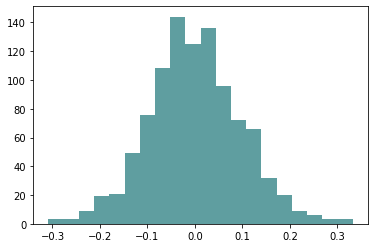

In [14]:
mu, sigma = 0, 0.1 # mean and standard deviation
normal = np.random.normal(mu, sigma, 1000)
plt.hist(normal, bins = 20, color = "cadetblue");

- **Uniforme**: la distribución uniforme describe el comportamiento de una variable discreta que puede tomar n valores distintos con la misma probabilidad cada uno de ellos. 


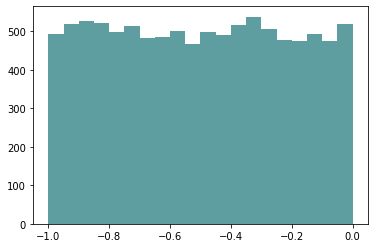

In [15]:
uniforme = np.random.uniform(-1,0,10000)
plt.hist(uniforme, bins = 20, color = "cadetblue");

- **Binomial**: la distribución binomial, es una distribución de probabilidad discreta que describe el número de éxitos al realizar n experimentos o ensayos de Bernoulli independientes entre sí. 

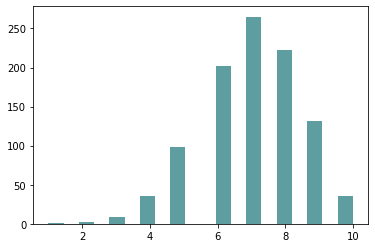

In [16]:
n, p = 10, 0.7 
binomial = np.random.binomial(n, p, 1000)
plt.hist(binomial, bins = 20, color = "cadetblue");

- **Poisson**: la distribución de Poisson es una distribución de probabilidad discreta que modeliza la frecuencia de eventos determinados durante un intervalo de tiempo fijado a partir de la frecuencia media de aparición de dichos eventos.

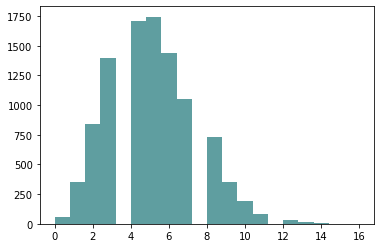

In [17]:
poisson = np.random.poisson(5, 10000)
plt.hist(poisson, bins = 20, color = "cadetblue");

- **Exponencial**: la distribución exponencial es una distribución continua que se utiliza para modelar tiempos de espera para la ocurrencia de un cierto evento.


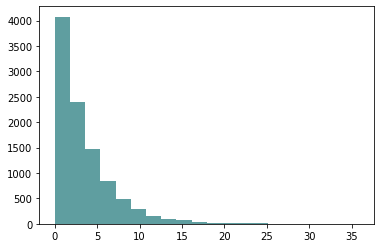

In [18]:
exponencial = np.random.exponential(3.45, 10000)
plt.hist(exponencial, bins = 20, color = "cadetblue");

# Tipos de aprendizajes(*machine learning*)


- **Aprendizaje supervisado**: En los algoritmos de aprendizaje supervisado se genera un modelo predictivo, basado en datos de entrada y salida. La palabra clave “supervisado” viene de la idea de tener un conjunto de datos previamente etiquetado y clasificado, es decir, tener un conjunto de muestra, el cual ya se sabe a qué grupo, valor o categoría pertenecen los ejemplos. 


- **Apendizaje no supervisado**: Los algoritmos de Aprendizaje no Supervisados infieren patrones de un conjunto de datos sin referencia a resultados conocidos o etiquetados. A diferencia del Aprendizaje Supervisado, los métodos de Aprendizaje no Supervisado no se pueden aplicar directamente a un problema de regresión o clasificación porque no tiene idea de cuáles pueden ser los valores de los datos de salida.


# Tipos de modelos


- **Modelo de regresión***: Cuando usamos regresión, el resultado es un número. Es decir, el resultado de la técnica de machine learning que estemos usando será un valor numérico, dentro de un conjunto infinito de posibles resultados.

    Algunos ejemplos de regresión:

    - Predecir por cuánto se va a vender una propiedad inmobiliaria
    - Predecir cuánto tiempo va a permanecer un empleado en una empresa
    - Estimar cuánto tiempo va a tardar un vehículo en llegar a su destino
    - Estimar cuántos productos se van a vender
    
    Técnicas de Machine Learning para Regresión

    - Regresión lineal y regresión no lineal
    - Decision trees
    - Random forests
    - redes neuronales deep learning



- **Modelo de clasificación**: Cuando usamos clasificación, el resultado es una clase, entre un número limitado de clases. Con clases nos referimos a categorías arbitrarias según el tipo de problema.

    Por ejemplo, si queremos detectar si un correo es spam o no, sólo hay 2 clases. Y el algoritmo de machine learning de clasificación, tras darle un correo electrónico, tiene que elegir a qué clase pertenece: spam o no-spam. Hay muchos más ejemplos, por supuesto:

    - ¿comprará el cliente este producto? sí, no
    - ¿tipo de tumor? maligno, benigno
    - ¿subirá el índice bursátil? sí, no
    - ¿es este comportamiento una anomalía? sí, no
    - ¿nos devolverá este cliente un crédito? sí, no
    - ¿qué deporte estás haciendo? tal y como lo detectan los relojes inteligentes caminar, correr, bicicleta, nadar
    - ¿obtendrá una historia un número alto de visitas en un agregador de noticias? sí, no

    Técnicas de Machine Learning para Clasificación

    - regresión logística
    - Decision trees
    - Random forests
    - redes neuronales y deep learning

